# Ecommerce Purchases Exercise

In this Exercise you will be given some Fake Data about some purchases done through Amazon! Just go ahead and follow the directions and try your best to answer the questions and complete the tasks. Feel free to reference the solutions. Most of the tasks can be solved in different ways. For the most part, the questions get progressively harder.

Please excuse anything that doesn't make "Real-World" sense in the dataframe, all the data is fake and made-up.

Also note that all of these questions can be answered with one line of code.
____
** Import pandas and read in the Ecommerce Purchases csv file and set it to a DataFrame called ecom. **

In [68]:
import pandas as pd
import seaborn as sns

In [3]:
EP = pd.read_csv('EcommercePurchases .csv')
ecom = pd.DataFrame(EP)

**Check the head of the DataFrame.**

In [103]:
ecom.head(5)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


** How many rows and columns are there? **

In [5]:
rows = len(ecom.index)
columns = len(ecom.columns)
print(rows, columns)

10000 14


** What is the average Purchase Price? **

In [6]:
Average = EP['Purchase Price'].mean()
Average

50.34730200000025

** What were the highest and lowest purchase prices? **

In [7]:
Highest = ecom['Purchase Price'].max()
Highest

99.99

In [8]:
Lowest = ecom['Purchase Price'].min()
Lowest

0.0

** How many people have English 'en' as their Language of choice on the website? **

In [9]:
English = sum(ecom['Language'] == 'en')
English

1098

** How many people have the job title of "Lawyer" ? **


In [27]:
sum(ecom['Job'].str.lower().str.contains('lawyer'))

30

** How many people made the purchase during the AM and how many people made the purchase during PM ? **

**(Hint: Check out [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) ) **

In [18]:
AM = sum(ecom['AM or PM'] == 'AM')
PM = sum(ecom['AM or PM'] == 'PM')
print(AM, PM)

4932 5068


** What are the 5 most common Job Titles? **

In [24]:
top_5 = ecom['Job'].value_counts()
top_5.head(5)

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Purchasing manager                   27
Name: Job, dtype: int64

** Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction? **

In [30]:
ecom[ecom['Lot'] == '90 WT']['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

** What is the email of the person with the following Credit Card Number: 4926535242672853 **

In [33]:
ecom[ecom['Credit Card'] == 4926535242672853]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

** How many people have American Express as their Credit Card Provider *and* made a purchase above $95 ?**

In [48]:
a = ecom[ecom['CC Provider'] == 'American Express']['Purchase Price'].value_counts()
People_American_express = a == 95
sum(People_American_express)

0

** Hard: How many people have a credit card that expires in 2025? **

In [70]:
sum(ecom['CC Exp Date'].str.contains('25'))

1033

** Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) **

In [75]:
import collections
import operator

x = collections.Counter() #Counter() is a dictionary of collections library
for i in ecom['Email'].unique(): #i is an email in Email collumns
    a = i.split('@') #a is an array with 2 element inside: user - provider
    x[a[1]] += 1 #adding provider as a key in dictionary x and count when there is same value

#use sorted() in operator library with the input is the element in x
#1 is sort by value in item
sorted_x = sorted(x.items(), key=operator.itemgetter(1),reverse = True) 
sorted_x_5 = sorted_x[:5]
sorted_x_5


[('hotmail.com', 1625),
 ('yahoo.com', 1601),
 ('gmail.com', 1587),
 ('smith.com', 42),
 ('williams.com', 37)]

### Data Visualization

** Implement a bar plot for top 5 most popular email providers/hosts **

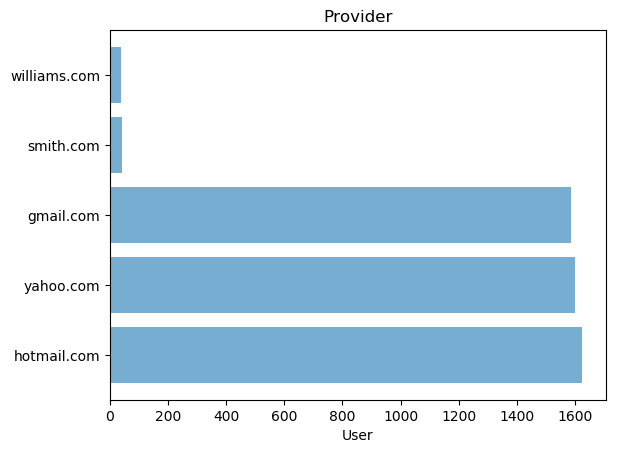

In [99]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
 
provider = ('hotmail.com', 'yahoo.com', 'gmail.com', 'smith.com', 'williams.com')
y = np.arange(5)
user = [1625,1601,1587,42,37]
 
plt.barh(y, user, alpha = 0.6)
plt.yticks(y, objects)
plt.xlabel('User')
plt.title('Provider')
 
plt.show()

** Plot distribution of Purchase Price **

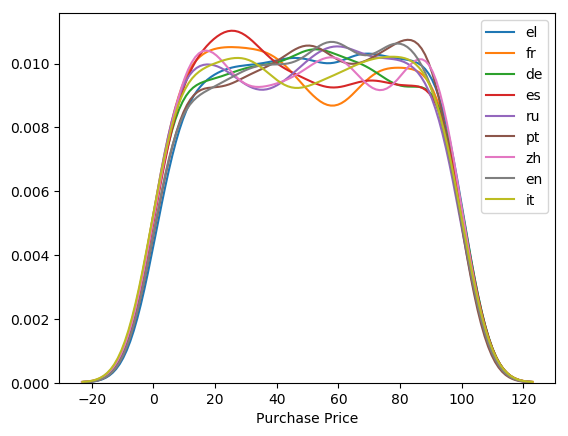

In [105]:
sns.distplot(ecom[ecom['Language'] == 'el']['Purchase Price'], hist=False, label='el')
sns.distplot(ecom[ecom['Language'] == 'fr']['Purchase Price'], hist=False, label='fr')
sns.distplot(ecom[ecom['Language'] == 'de']['Purchase Price'], hist=False, label='de')
sns.distplot(ecom[ecom['Language'] == 'es']['Purchase Price'], hist=False, label='es')
sns.distplot(ecom[ecom['Language'] == 'ru']['Purchase Price'], hist=False, label='ru')
sns.distplot(ecom[ecom['Language'] == 'pt']['Purchase Price'], hist=False, label='pt')
sns.distplot(ecom[ecom['Language'] == 'zh']['Purchase Price'], hist=False, label='zh')
sns.distplot(ecom[ecom['Language'] == 'en']['Purchase Price'], hist=False, label='en')
sns.distplot(ecom[ecom['Language'] == 'it']['Purchase Price'], hist=False, label='it')

** Implement countplot on Language **

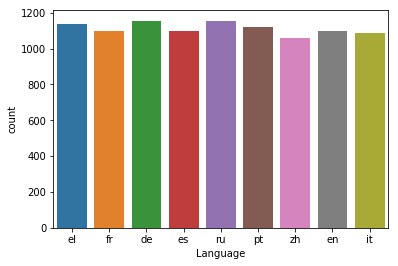

In [71]:
sns.countplot(x = 'Language', data = ecom)

In [ ]:
Feel free to plot more graphs to dive deeper into the dataset.

# Great Job!